In [ ]:
from bs4 import BeautifulSoup
import requests
import re 

In [ ]:
# This is the piece of code to scrape all of the urls - takes about 7mins without scraping

# full_list_url = []

# for i in range(1,333):
#     base_url = f"https://www.immoweb.be/en/search/house/for-sale?countries=BE&page={i}&orderBy=relevance"
#     r = requests.get(base_url)
#     soup = BeautifulSoup(r.content, "html.parser")
    
#     for elem in soup.find_all("a", attrs={"class":"card__title-link"}):
#          full_list_url.append(elem.get('href'))
#          with open("full_list.txt", "a") as f:
#             f.write(elem.get('href'))
#             f.write('\n')
            
# print("Written to text file Successfully!")
# print(len(full_list_url))

In [ ]:
# TEST THREADING
import requests
from bs4 import BeautifulSoup
import threading
import time

# Function to scrape URLs
def scrape_urls(page_num):
    base_url = f"https://www.immoweb.be/en/search/house/for-sale?countries=BE&page={page_num}&orderBy=relevance"
    r = requests.get(base_url)
    soup = BeautifulSoup(r.content, "html.parser")
    
    urls = []
    for elem in soup.find_all("a", attrs={"class": "card__title-link"}):
        urls.append(elem.get('href'))
        
    # Save URLs to file - full_list.txt (local storage)
    with open("full_list.txt", "a") as f:
        for url in urls:
            f.write(url + '\n')
    return urls

def thread_scraping():
    full_list_url = []
    num_pages = 333

    # Create a list to store threads
    threads = []
    start_time = time.time()  # Start timer
    
    # Create and start threads
    for i in range(1, num_pages + 1):
        t = threading.Thread(target=lambda: full_list_url.extend(scrape_urls(i)))
        threads.append(t)
        t.start()

    # Wait for all threads to complete and then join
    for t in threads:
        t.join()

    end_time = time.time()  # Stop timer
    execution_time = end_time - start_time

    print("Scraping completed!")
    print("Total URLs scraped:", len(full_list_url))
    print("Total time:", execution_time, "seconds")


thread_scraping()

Scraping completed!
Total URLs scraped: 19980
Total time: 58.4198853969574 seconds


In [ ]:
import requests
from bs4 import BeautifulSoup as soup
import re
import json

#https://www.immoweb.be/en/classified/house/for-sale/libin/6890/10657263        

url = "https://www.immoweb.be/en/classified/apartment/for-sale/deinze/9800/10663064"
house_page = requests.get(url)
house_page = soup(house_page.text, 'html.parser')

regex = r"window.classified = (\{.*\})"

script = house_page.find('div',attrs={"id":"main-container"}).script.text
script = re.findall(regex, script)
 
script = json.loads(script[0])
#print(script['property']['location']['locality'])

{'id': 10663064,
 'cluster': None,
 'customers': [{'id': 2118760,
   'type': 'AGENCY',
   'email': '199809@secure.fortissimmo.net',
   'logoUrl': 'https://static.immoweb.be/logos/2118760.gif?cache=2016101403100',
   'phoneNumber': '+32 9 225 25 24',
   'mobileNumber': None,
   'name': 'Landbergh',
   'website': 'http://www.landbergh.be/',
   'location': {'country': 'Belgium',
    'region': None,
    'province': 'East Flanders',
    'district': 'Gent',
    'locality': 'Gentbrugge',
    'postalCode': '9050',
    'street': 'Brusselsesteenweg 690',
    'number': None,
    'box': None,
    'propertyName': None,
    'floor': None,
    'latitude': 51.03,
    'longitude': 3.77,
    'distance': None,
    'approximated': None,
    'regionCode': None,
    'type': None,
    'hasSeaView': None,
    'pointsOfInterest': None,
    'placeName': None},
   'ipiNo': '505.931',
   'isOwner': True,
   'contactHoursMobile': 'anytime',
   'contactHoursLandline': 'anytime',
   'salesRepresentative': None,
   '

In [ ]:
def scrape_house(url):
    """Scrapes all the info from a house listing"""

    # Get the house listing and make a soup
    house_page = requests.get(url)
    house_page = soup(house_page.text, 'html.parser')
    final_dictionary = {}

    # Get the hidden info from the java script
    regex = r"window.classified = (\{.*\})"
    script = house_page.find('div',attrs={"id":"main-container"}).script.text
    script = re.findall(regex, script)

    final_dictionary = {}
        #Locality
    try:
        script = json.loads(script[0])
    except:
        return {}
        #Locality
    
    try:
        final_dictionary['locality'] = script['property']['location']['locality']
    except:
        final_dictionary['locality'] = 'UNKNOWN'
    #type of property
    try:
        final_dictionary['property_type'] = script['property']['type']
    except:
        final_dictionary['type of property'] = 'UNKNOWN'
    #subtype of property
    try:
        final_dictionary['subtype of property'] = script['property']['subtype']
    except:
        final_dictionary['subtype of property'] = 'UNKNOWN'
    #price
    try:
        final_dictionary['price'] = script['price']['mainValue']
    except:
        final_dictionary['price'] = 'UNKNOWN'
    #- Number of rooms
    try:
        final_dictionary['number_rooms'] = script['property']['bedroomCount']
    except:
        final_dictionary['number_rooms'] = 'UNKNOWN'
    # living area
    try:
        final_dictionary['living_area'] = script['property']['netHabitableSurface']
    except:
        final_dictionary['living_area'] = 'UNKNOWN'
    # Fully equipped kitchen (Yes/No)
    try:
        final_dictionary['kitchen'] = script['property']['kitchen']['type']
    except:
        final_dictionary['kitchen'] = 0
    # NOT INSTALLED / INSTALLED 
    # Furnished (Yes/No)
    try:
        final_dictionary['furnished'] = script['transaction']['sale']['isFurnished']
    except:
        final_dictionary['furnished'] = 'UNKNOWN'
    # Open fire (Yes/No)
    try:
        final_dictionary['fireplace'] = script['property']['fireplaceCount']
    except:
        final_dictionary['fireplace'] = 0

    # Terrace (Yes/No)
    try:
        final_dictionary['terrace'] = script['property']['hasTerrace']
    except:
        final_dictionary['terrace'] = 0
    # If yes: Area
    try:
        final_dictionary['terrace_area'] = script['property']['terraceSurface']
    except: 
        final_dictionary['terrace_area'] = 0
    # Garden
    try:
        final_dictionary['garden'] = script['property']['hasGarden']
    except:
        final_dictionary['garden'] = 0
    #- If yes: Area
    try:
        final_dictionary['garden_area'] = script['property']['gardenSurface']
    except:
        final_dictionary['garden_area'] = 0
    # Surface of the land
    try: 
        final_dictionary['surface_land'] = script['property']['land']['surface']
    except:
        final_dictionary['surface_land'] = "UNKNOWN"
    # Surface area of the plot of land - TO ASK
    # Number of facades
    try:
        final_dictionary['number_facades'] = script['property']['building']['facadeCount']
    except:
        final_dictionary['number_facades'] = "UNKNOWN"
    # Swimming pool (Yes/No)
    try:
        final_dictionary['swimming_pool'] =  script['property']['hasSwimmingPool']
    except:
        final_dictionary['swimming_pool'] = 0
    # State of the building (New, to be renovated, ...)
    try:
        final_dictionary['building_state'] = script['property']['building']['condition']
    except:
        final_dictionary['building_state'] = 'UNKNOWN'

    return final_dictionary

In [ ]:
# import requests
# from bs4 import BeautifulSoup as soup
# import re
# import json
# from concurrent.futures import ThreadPoolExecutor,ProcessPoolExecutor, as_completed
# import time
# import pandas as pd

# houses_links = []

# with ThreadPoolExecutor(max_workers=10) as executor:
#     futures = [executor.submit(scrape_house, url) for url in houses_links]
#     results =  [item.result() for item in futures]
#     df = pd.DataFrame(results)

In [ ]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor,ProcessPoolExecutor, as_completed

def create_dataframe():
    houses_links = []
    with open("./full_list_20k.txt", "r") as f:
        # count = 0
        for url in f:
            #if count < 300:
            houses_links.append(url)
            # count +=1
            # else:
            #     break

    with ThreadPoolExecutor(max_workers=10) as executor:
        try:
            futures = [executor.submit(scrape_house, url) for url in houses_links]
            results =  [item.result() for item in futures]
            df = pd.DataFrame(results)
        except:
            print("BREAK! Writing scraped records to csv")
            df.to_csv('dataframe.csv', index = True)
            return df
    return df


In [ ]:
df = create_dataframe()

In [ ]:
df.to_csv('dataframe.csv', index=True)

In [1]:
import pandas as pd 
df = pd.read_csv('./data_output/dataframe_20k_290623.csv')
df

,Unnamed: 0,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,19975,Brecht,HOUSE,HOUSE,375000.0,3.0,NaN,INSTALLED,False,NaN,NaN,NaN,True,245.0,712,4,False,GOOD
19976,19976,Hasselt,APARTMENT,APARTMENT,1295000.0,3.0,191.0,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,GOOD
19977,19977,Temse,HOUSE,HOUSE,549000.0,5.0,324.0,NaN,NaN,NaN,True,30.0,True,290.0,427,3,NaN,GOOD
19978,19978,Affligem,HOUSE,HOUSE,485000.0,4.0,265.0,0,NaN,NaN,NaN,NaN,NaN,NaN,228,3,False,GOOD


In [2]:
rows_to_remove = []
for index, row in df.iterrows():
    if row.isnull().all():
        rows_to_remove.append(index)

# Remove the marked rows from the DataFrame
df = df.drop(rows_to_remove)
df.to_csv('cleaned.csv', index=True)

In [35]:
df_clean = pd.read_csv('cleaned.csv', index_col=0)
df_clean

,Unnamed: 0,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,19975,Brecht,HOUSE,HOUSE,375000.0,3.0,NaN,INSTALLED,False,NaN,NaN,NaN,True,245.0,712,4,False,GOOD
19976,19976,Hasselt,APARTMENT,APARTMENT,1295000.0,3.0,191.0,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,GOOD
19977,19977,Temse,HOUSE,HOUSE,549000.0,5.0,324.0,NaN,NaN,NaN,True,30.0,True,290.0,427,3,NaN,GOOD
19978,19978,Affligem,HOUSE,HOUSE,485000.0,4.0,265.0,0,NaN,NaN,NaN,NaN,NaN,NaN,228,3,False,GOOD


In [36]:
import pygwalker as pyg


In [37]:
import pandas as pd

def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

In [38]:
import numpy as np

# LEAVING LOCALITY AS IS
analyze_column(df_clean, 'locality')


Analysis for column 'locality':
Number of NaN values: 6
Number of unique values: 2613
Percentage of NaN values: 0.03%
Percentage of unique values: 13.08%
Unique values: ['Ham' 'Putte' 'IVOZ-RAMET' ... 'Louveigné' 'GrÃce-Hollogne' 'Schoonaarde']


In [39]:
analyze_column(df_clean,'type of property')

    # Type of property (House/apartment)
    # Apartment group and House group == NO PRICE
    # 299 HOUSE GROUP
    # 176 APPARTMENT GROUP
    # We can drop them if we need to
df_clean['type of property'].isna().sum()
df_clean['type of property'].unique()

Analysis for column 'type of property':
Number of NaN values: 6
Number of unique values: 4
Percentage of NaN values: 0.03%
Percentage of unique values: 0.02%
Unique values: ['HOUSE' 'APARTMENT' 'APARTMENT_GROUP' 'HOUSE_GROUP' nan]


array(['HOUSE', 'APARTMENT', 'APARTMENT_GROUP', 'HOUSE_GROUP', nan],
      dtype=object)

In [40]:
    # Subtype of property (Bungalow, Chalet, Mansion, ...)
analyze_column(df_clean,'subtype of property')
    
df_clean.describe()
    # Price
    # Type of sale (Exclusion of life sales

Analysis for column 'subtype of property':
Number of NaN values: 6
Number of unique values: 25
Percentage of NaN values: 0.03%
Percentage of unique values: 0.13%
Unique values: ['VILLA' 'HOUSE' 'APARTMENT_BLOCK' 'CHALET' 'COUNTRY_COTTAGE' 'APARTMENT'
 'APARTMENT_GROUP' 'FLAT_STUDIO' 'MIXED_USE_BUILDING'
 'EXCEPTIONAL_PROPERTY' 'TOWN_HOUSE' 'PENTHOUSE' 'DUPLEX' 'GROUND_FLOOR'
 'HOUSE_GROUP' 'MANSION' 'BUNGALOW' 'OTHER_PROPERTY' 'CASTLE'
 'SERVICE_FLAT' 'LOFT' 'KOT' 'TRIPLEX' 'FARMHOUSE' 'MANOR_HOUSE' nan]


,Unnamed: 0,price,number_rooms,living_area,fireplace,terrace_area,garden_area
count,19980.000000,1.949900e+04,19499.000000,18445.000000,6176.000000,7391.000000,5916.000000
mean,9989.500000,5.047633e+05,3.392174,208.794199,-0.567681,31.398322,807.842630
std,5767.873525,5.886544e+05,1.826679,315.292051,0.857613,41.743011,3288.712716
min,0.000000,9.500000e+03,0.000000,11.000000,-1.000000,1.000000,1.000000
25%,4994.750000,2.490000e+05,2.000000,120.000000,-1.000000,12.000000,89.000000
50%,9989.500000,3.590000e+05,3.000000,169.000000,-1.000000,21.000000,235.000000
75%,14984.250000,5.450000e+05,4.000000,240.000000,-1.000000,37.000000,651.000000
max,19979.000000,2.250000e+07,60.000000,26218.000000,10.000000,1620.000000,120000.000000


In [41]:
# NUMBER OF ROOMS (nan values set to 0)
df_clean['number_rooms'] = df_clean['number_rooms'].replace('nan', np.nan).fillna(0)
analyze_column(df_clean, 'number_rooms')

Analysis for column 'number_rooms':
Number of NaN values: 0
Number of unique values: 29
Percentage of NaN values: 0.00%
Percentage of unique values: 0.15%
Unique values: [ 4.  5.  3.  2.  1.  0.  6.  7. 25. 17. 10. 12.  8.  9. 11. 27. 14. 21.
 13. 16. 30. 15. 18. 46. 24. 19. 22. 60. 20.]


In [42]:
# NUMBER OF ROOMS (nan values set to 0)
df_clean['living_area'] = df_clean['living_area'].replace('nan', np.nan).fillna(df_clean['living_area'].mean())
analyze_column(df_clean, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 0
Number of unique values: 726
Percentage of NaN values: 0.00%
Percentage of unique values: 3.63%
Unique values: [2.15000000e+02 1.67000000e+02 1.30000000e+02 1.20000000e+02
 6.20000000e+01 8.00000000e+01 1.75000000e+02 9.00000000e+01
 4.40000000e+01 1.40000000e+02 1.08000000e+02 6.60000000e+01
 1.46000000e+02 1.35000000e+02 1.10000000e+02 1.64000000e+02
 1.68000000e+02 1.25000000e+02 2.16000000e+02 1.60000000e+02
 1.00000000e+02 8.10000000e+01 1.80000000e+02 1.81000000e+02
 9.40000000e+01 1.71000000e+02 1.22000000e+02 1.04000000e+02
 2.29000000e+02 5.26000000e+02 1.05000000e+02 9.50000000e+01
 2.54000000e+02 1.66000000e+02 3.75000000e+02 2.08794199e+02
 2.20000000e+02 1.48000000e+02 8.50000000e+01 9.90000000e+01
 2.40000000e+02 3.60000000e+01 1.06000000e+02 7.20000000e+01
 8.70000000e+01 8.90000000e+01 1.03000000e+02 1.45000000e+02
 2.58000000e+02 2.50000000e+02 3.20000000e+02 2.51000000e+02
 2.10000000e+02 2.86000000e+02 1.9000

In [43]:
df_clean['kitchen'] = df_clean['kitchen'].replace('0', 'NOT_INSTALLED')
df_clean['kitchen'] = df_clean['kitchen'].replace(np.nan, 'NOT_INSTALLED')
analyze_column(df_clean, 'kitchen')

Analysis for column 'kitchen':
Number of NaN values: 0
Number of unique values: 8
Percentage of NaN values: 0.00%
Percentage of unique values: 0.04%
Unique values: ['INSTALLED' 'USA_INSTALLED' 'SEMI_EQUIPPED' 'NOT_INSTALLED'
 'HYPER_EQUIPPED' 'USA_HYPER_EQUIPPED' 'USA_SEMI_EQUIPPED'
 'USA_UNINSTALLED']


In [44]:
df_clean['furnished'] = df_clean['furnished'].replace(np.nan, False)
df_clean['furnished'] = df_clean['furnished'].replace(False, 0)
df_clean['furnished'] = df_clean['furnished'].replace(True, 1)
analyze_column(df_clean, 'furnished')

Analysis for column 'furnished':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [0 1]


In [45]:
df_clean['terrace'] = df_clean['terrace'].fillna(0)
df_clean['terrace'] = df_clean['terrace'].replace(True, 1)
analyze_column(df_clean, 'terrace')

Analysis for column 'terrace':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [0 1]


In [46]:
df_clean['terrace_area'] = df_clean['terrace_area'].replace(np.nan, 0)
analyze_column(df_clean, 'terrace_area')

Analysis for column 'terrace_area':
Number of NaN values: 0
Number of unique values: 175
Percentage of NaN values: 0.00%
Percentage of unique values: 0.88%
Unique values: [0.00e+00 1.20e+01 4.50e+01 3.00e+01 2.00e+01 9.00e+00 2.80e+01 3.20e+01
 8.10e+01 1.00e+01 3.50e+01 6.50e+01 1.60e+01 1.80e+01 1.00e+00 1.50e+01
 2.60e+01 2.70e+01 3.10e+01 2.50e+01 8.50e+01 6.00e+01 2.40e+01 4.00e+00
 7.00e+00 4.00e+01 6.00e+00 4.10e+01 4.40e+01 3.70e+01 5.00e+01 8.00e+02
 1.40e+01 2.20e+01 2.10e+01 6.80e+01 1.60e+02 8.60e+01 5.00e+00 8.00e+00
 4.60e+01 3.40e+01 8.00e+01 5.90e+01 1.40e+02 6.40e+01 4.80e+01 1.02e+02
 1.90e+01 1.20e+02 1.00e+02 1.30e+01 4.90e+01 1.50e+02 2.00e+00 3.80e+01
 3.30e+01 3.96e+02 9.60e+01 4.20e+01 9.20e+01 6.60e+01 6.10e+01 1.10e+01
 1.95e+02 3.00e+00 3.26e+02 1.70e+01 8.90e+01 7.00e+01 1.04e+02 6.20e+01
 2.90e+01 4.95e+02 1.23e+02 5.50e+01 1.11e+02 5.70e+01 4.30e+01 9.00e+01
 1.47e+02 2.30e+01 3.00e+02 3.60e+01 5.60e+01 5.40e+01 5.30e+01 7.20e+01
 2.36e+02 1.10e+02 1.08e+0

In [47]:
df_clean['garden'] = df_clean['garden'].fillna(False)
df_clean['garden'] = df_clean['garden'].replace(True, 1)
df_clean['garden'] = df_clean['garden'].replace(False, 0)
analyze_column(df_clean, 'garden')

Analysis for column 'garden':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [1 0]


In [48]:
df_clean['garden_area'] = df_clean['garden_area'].fillna(0)
analyze_column(df_clean, 'garden_area')

Analysis for column 'garden_area':
Number of NaN values: 0
Number of unique values: 1099
Percentage of NaN values: 0.00%
Percentage of unique values: 5.50%
Unique values: [   0.   95.   80. ... 1458.  534.  432.]


In [49]:
# TO DO 
analyze_column(df_clean, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 1771
Number of unique values: 2676
Percentage of NaN values: 8.86%
Percentage of unique values: 13.39%
Unique values: ['1472' '416' '182' ... '2377' '3609' '1033']


In [50]:
# Setting number of facades to 1 if currently number of facades is NaN or Unknown (makes sense theres at least 1 facade)
df_clean['number_facades'] = df_clean['number_facades'].replace(np.nan, '1')
df_clean['number_facades'] = df_clean['number_facades'].replace('UNKNOWN', '1')
df_clean['number_facades'] = df_clean['number_facades'].astype(int)
analyze_column(df_clean, 'number_facades')

Analysis for column 'number_facades':
Number of NaN values: 0
Number of unique values: 8
Percentage of NaN values: 0.00%
Percentage of unique values: 0.04%
Unique values: [ 4  3  2  1  6 26  5 14]


In [51]:
df_clean['swimming_pool'] = df_clean['swimming_pool'].replace(np.nan, 0)
df_clean['swimming_pool'] = df_clean['swimming_pool'].replace(True, 1)
df_clean['swimming_pool'] = df_clean['swimming_pool'].replace(False, 0)
analyze_column(df_clean, 'swimming_pool')

Analysis for column 'swimming_pool':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [0 1]


In [52]:
# TOP DISCUSS WHAT TO DO WITH NAN VALUES. = GOOD? OR TO BE DONE UP?
# what we can do here is rank the conditions from 1 - 6 and assign the middle condition to the NaN values
df_clean['building_state'] = df_clean['building_state'].replace("UNKNOWN", np.nan)
analyze_column(df_clean, 'building_state')

Analysis for column 'building_state':
Number of NaN values: 4159
Number of unique values: 6
Percentage of NaN values: 20.82%
Percentage of unique values: 0.03%
Unique values: ['GOOD' 'JUST_RENOVATED' 'TO_BE_DONE_UP' 'TO_RENOVATE' 'AS_NEW' nan
 'TO_RESTORE']


In [61]:
#gwalker = pyg.walk(df_clean)

In [68]:
import matplotlib.pyplot as plt
def plot_hist(df_clean, column):
    plt.hist(df_clean[column], bins=120, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title('Histogram')

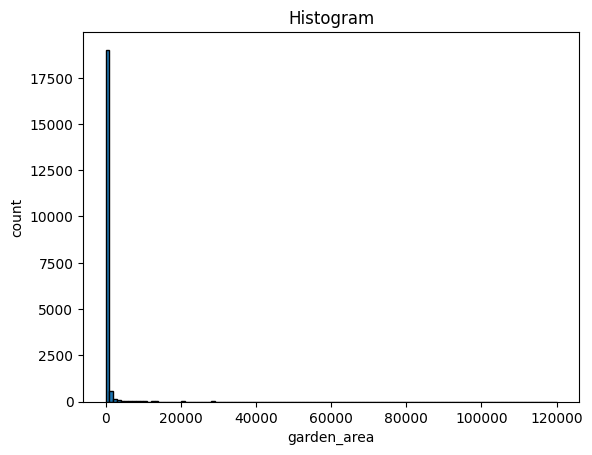

In [70]:
#plot_hist(df_clean, 'price')
plot_hist(df_clean, 'garden_area')